## Построение системы кредит скоринга 

Целью данного индивидуального проекта являлось построение системы кредит скоринга. Данные для обучения взяты с платформы kaggle. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

Загрузим данные и посмотрим на их содержимое. 

In [2]:
import pandas as pd 
traindata = pd.read_csv('CreditScore_train.csv')

In [3]:
traindata.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


В данных нет человекопонятного названия колонок. Поэтому будем проводить общий EDA.

### Проверим данные на наличие выбросов.  

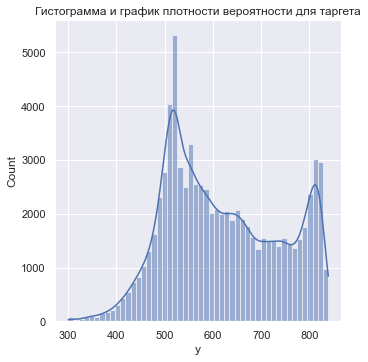

In [4]:
import seaborn as sns
sns.set()
sns.displot(traindata.y, kde=True, bins = 50)\
.set(title=f'Гистограмма и график плотности вероятности для таргета')

<AxesSubplot:xlabel='y'>

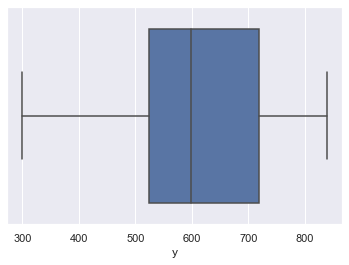

In [5]:
sns.boxplot(traindata.y)

Выбросов не наблюдается, но заметна небольшая бимодальность у распределения. 

### Посмотрим, есть ли у нас пропущенные значения

In [5]:
traindata.isna().sum()

x001        0
x002    17185
x003    17185
x004    17181
x005     4867
        ...  
x301        0
x302    58471
x303        0
x304    65456
y           0
Length: 305, dtype: int64

Пропущенные значения имеются.

### Удалим те колонки, в которых процент пропущенных значений превышает 50%

In [7]:
for col in traindata.columns:
    percentage = traindata[col].isna().sum()/traindata.shape[0]
    if percentage > 0.5:
        traindata.drop(col, 1, inplace=True)
        print(f'Column "{col}" was deleted cuz it has {round(percentage*100, 2)}% missing values')

Column "x098" was deleted cuz it has 80.67% missing values
Column "x155" was deleted cuz it has 79.14% missing values
Column "x162" was deleted cuz it has 66.55% missing values
Column "x242" was deleted cuz it has 93.39% missing values
Column "x253" was deleted cuz it has 66.39% missing values
Column "x255" was deleted cuz it has 77.02% missing values
Column "x256" was deleted cuz it has 77.02% missing values
Column "x257" was deleted cuz it has 77.02% missing values
Column "x259" was deleted cuz it has 77.54% missing values
Column "x265" was deleted cuz it has 66.53% missing values
Column "x266" was deleted cuz it has 66.53% missing values
Column "x267" was deleted cuz it has 66.53% missing values
Column "x268" was deleted cuz it has 67.33% missing values
Column "x275" was deleted cuz it has 56.26% missing values
Column "x293" was deleted cuz it has 51.11% missing values
Column "x295" was deleted cuz it has 86.6% missing values
Column "x297" was deleted cuz it has 58.05% missing value

### Найдем категориальные и количественные переменные  

Для этого посмотрим на количество уникальных значений в колонке. Если оно превышает 130, будем считать, что данный признак является численным.

In [8]:
categorical = []
numerical = []
for col in traindata.columns:
    if traindata[col].nunique() < 130:
        categorical.append(col)  
    else:
        numerical.append(col)

In [9]:
traindata[numerical].head()

,x001,x002,x003,x004,x005,x041,x042,x043,x044,x045,...,x281,x288,x289,x290,x291,x292,x294,x296,x303,y
0,1084094,426.0,39.0,128.0,426.0,0.6959,197600,60073,140000.0,200.0,...,484289,NaN,NaN,NaN,0,346762,0,0,0,807
1,1287777,160.0,2.0,64.0,160.0,0.0269,25000,24327,18000.0,600.0,...,125307,9.0,2.0,5.5,17318,124634,0,17318,0,819
2,1483016,163.0,16.0,104.0,239.0,0.0458,15400,14694,9000.0,500.0,...,706,NaN,NaN,NaN,0,0,0,0,0,803
3,959054,NaN,NaN,NaN,102.0,NaN,0,0,NaN,NaN,...,0,NaN,NaN,NaN,0,0,0,0,0,530
4,1342113,3.0,2.0,2.0,62.0,1.4199,300,-126,300.0,300.0,...,17413,2.0,2.0,2.0,17413,17413,0,17413,0,485


In [10]:
traindata[categorical].head()

,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,...,x282,x283,x284,x285,x286,x287,x298,x299,x300,x301
0,0,0,0,0,0,2,4,4,9,19,...,1,1,1,0,0,1.0,0,0,0,0
1,1,1,2,0,1,3,3,7,5,21,...,1,1,1,2,0,1.0,1,1,1,0
2,0,0,0,1,0,1,0,0,6,8,...,1,1,1,0,0,NaN,0,0,0,0
3,0,0,0,0,0,0,2,2,0,4,...,1,1,1,0,0,9.0,1,1,1,0
4,0,2,2,0,0,1,2,0,0,5,...,1,1,1,1,0,9.0,1,1,1,0


### Для категориальных колонок заполним пропущенные значения самым популярным значением, а для количественных средним 

In [11]:
traindata[categorical] = traindata[categorical].apply(lambda x: x.fillna(x.mode()[0]),axis=0)

In [12]:
traindata[numerical] = traindata[numerical].apply(lambda x: x.fillna(x.mean()),axis=0)

In [13]:
traindata.isna().sum().sum()

0

### Посмотрим на корреляцию численных переменных с таргетом

<AxesSubplot:>

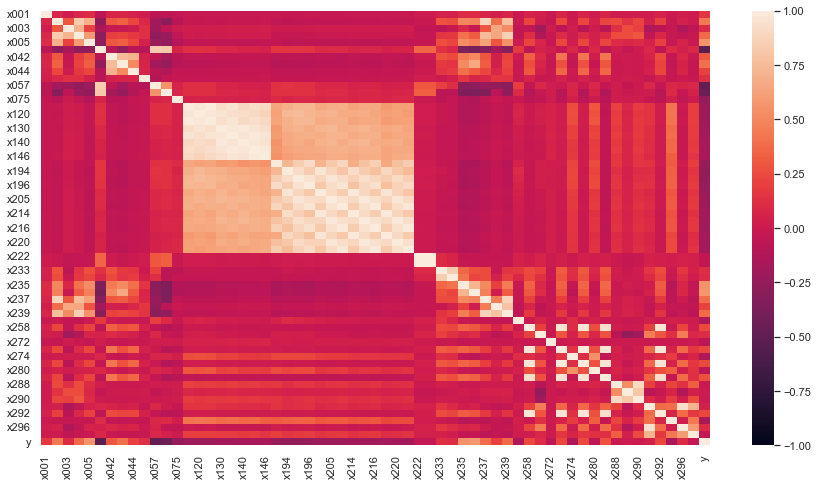

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
corr_matrix = traindata[numerical].corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1)

Заметны две проблемы. Очень сильная корреляция внутри переменных, а также наличие переменных, которые никак не коррелирует с таргетом.

### Выведем графики для всех переменных, чья корреляция с таргетом является низкой

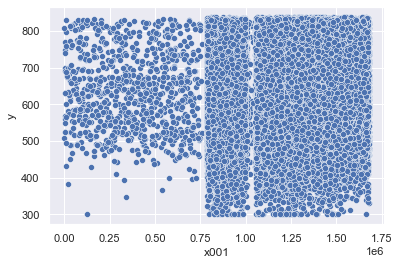

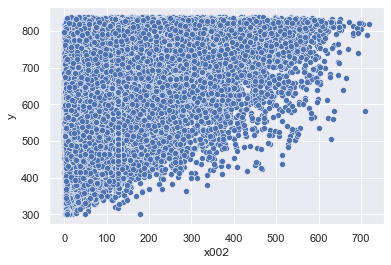

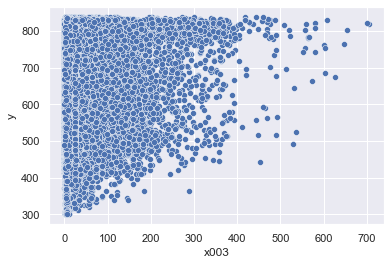

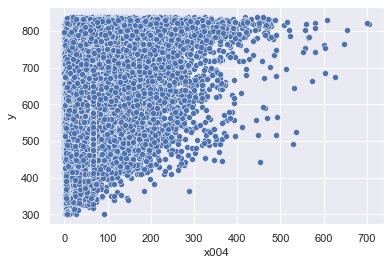

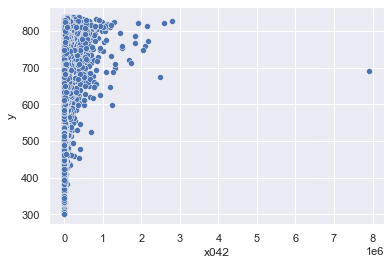

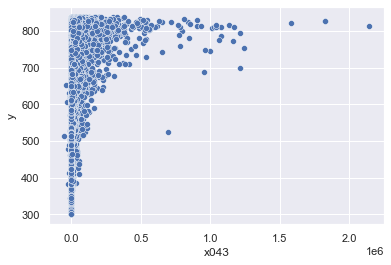

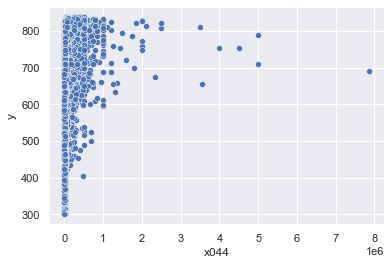

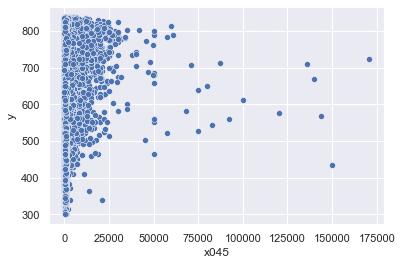

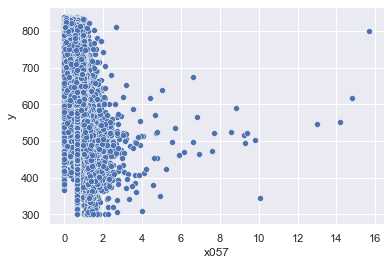

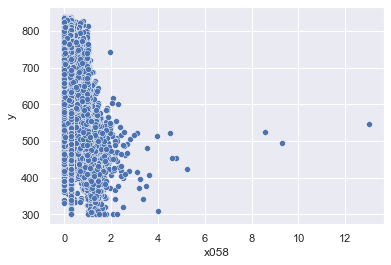

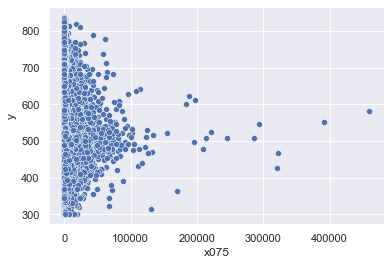

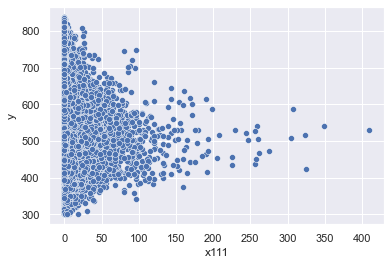

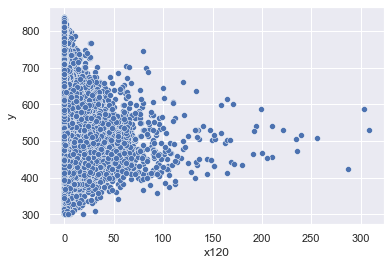

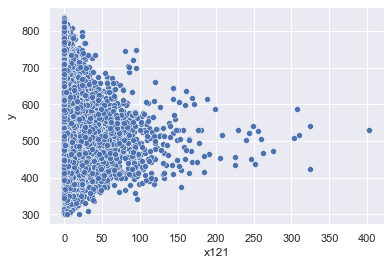

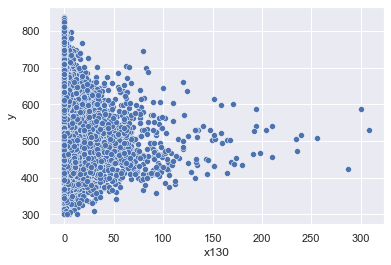

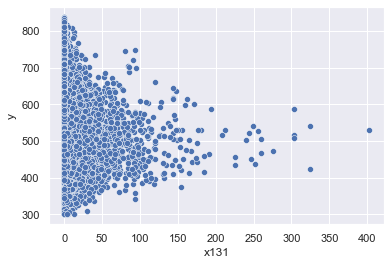

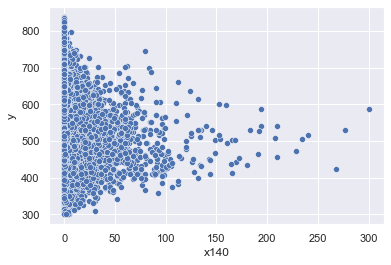

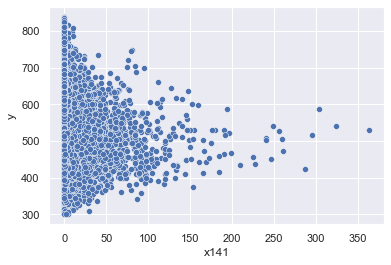

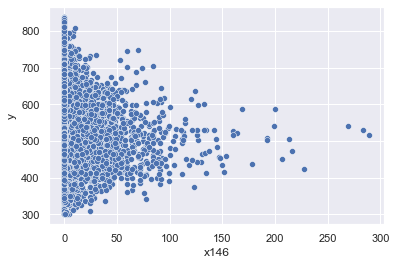

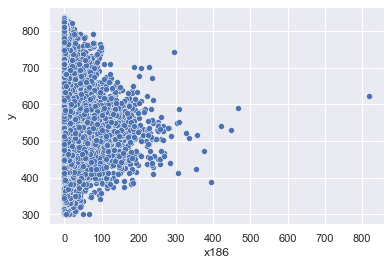

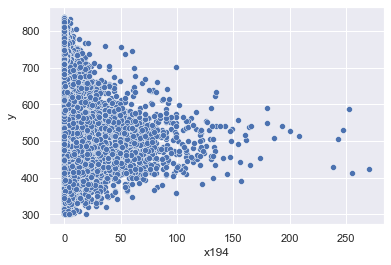

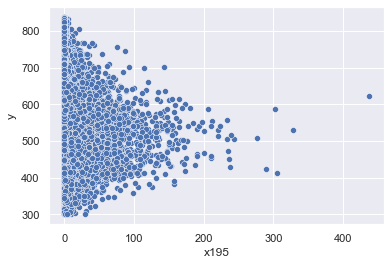

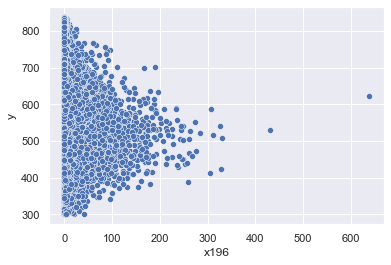

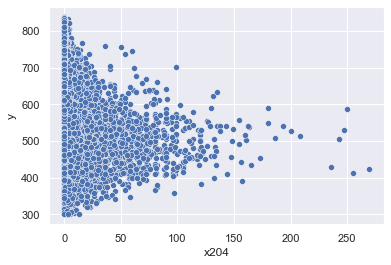

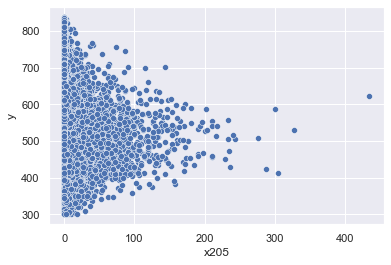

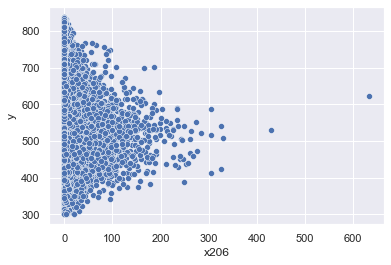

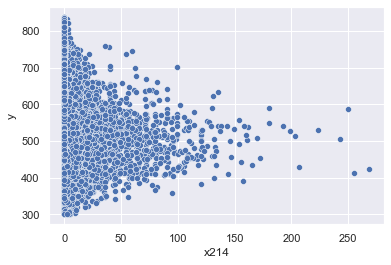

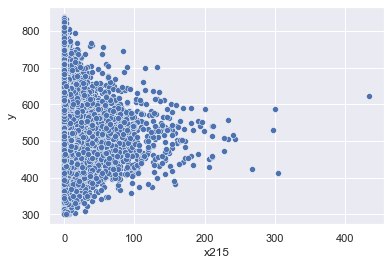

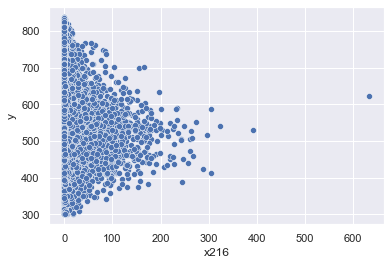

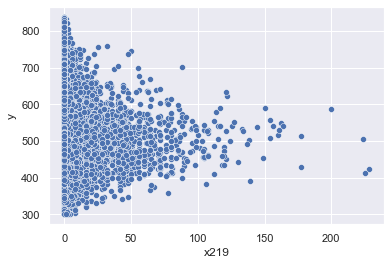

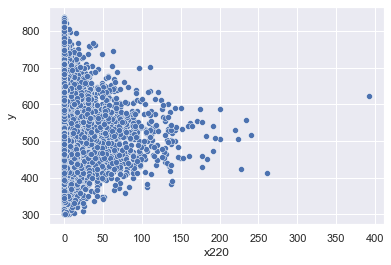

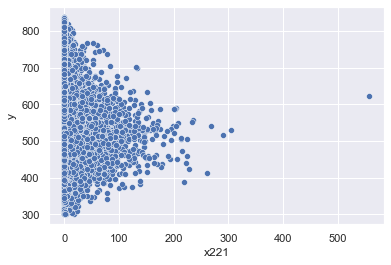

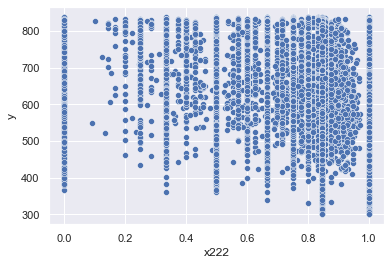

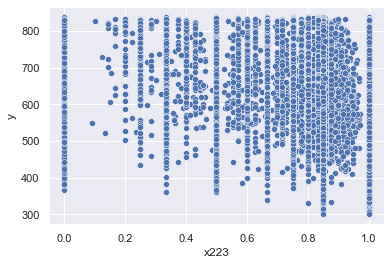

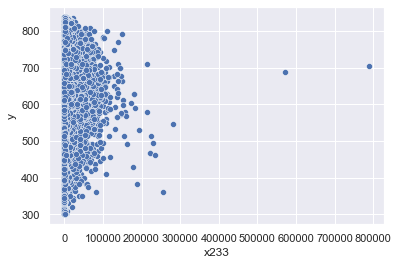

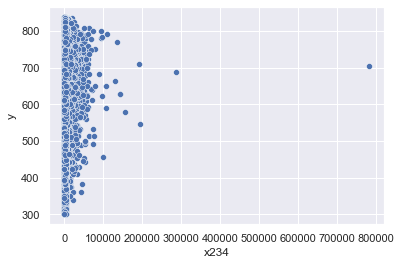

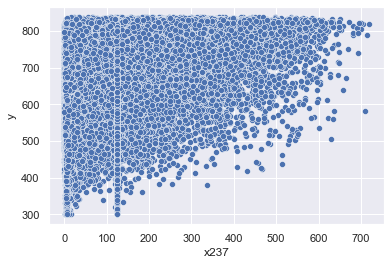

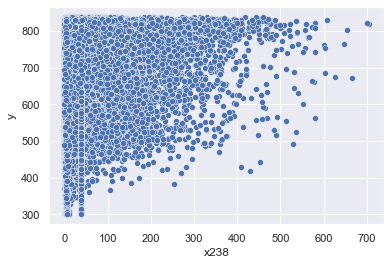

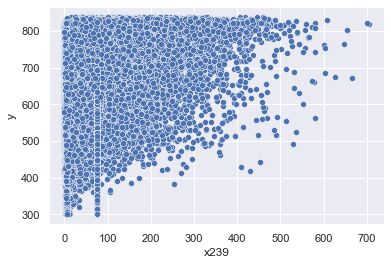

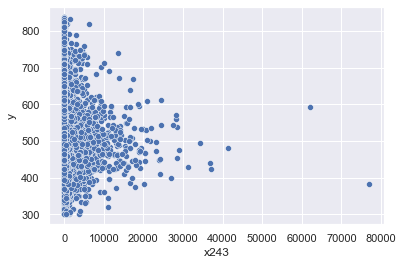

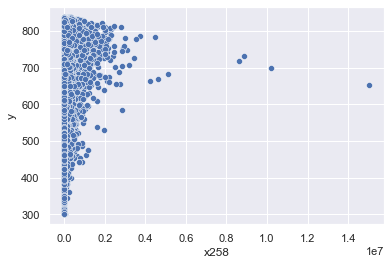

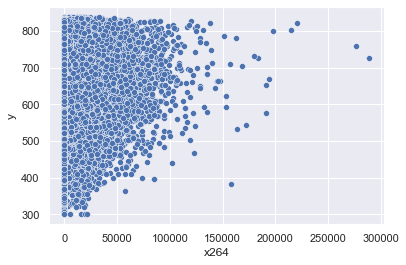

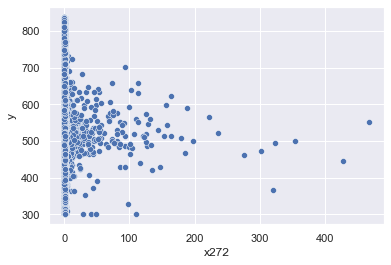

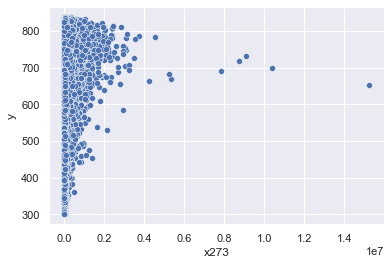

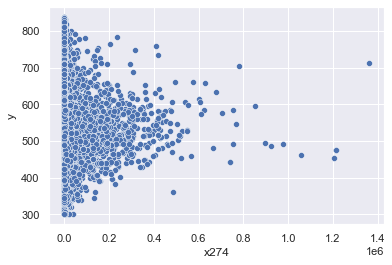

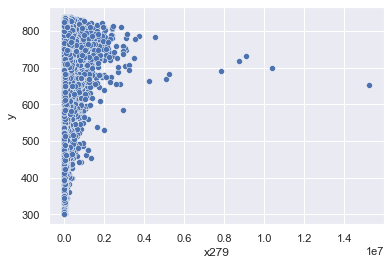

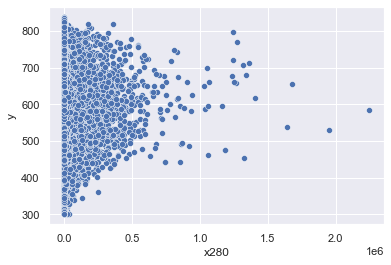

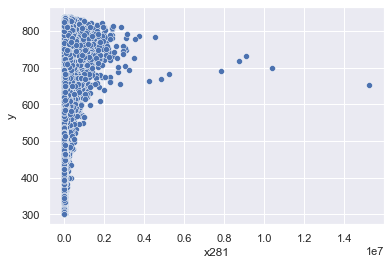

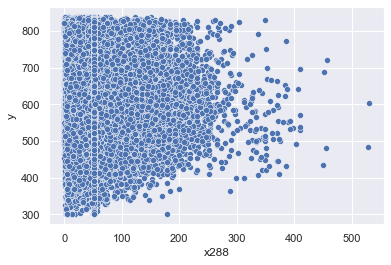

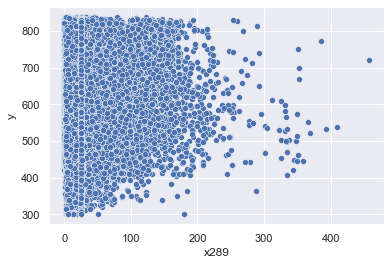

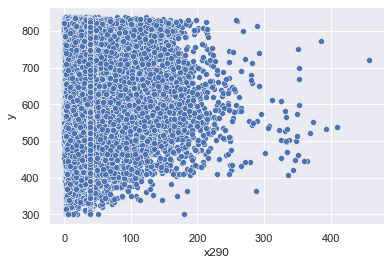

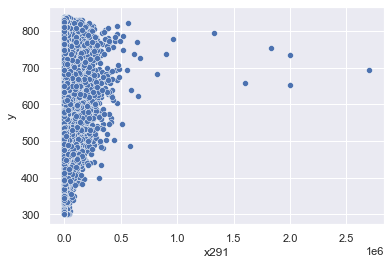

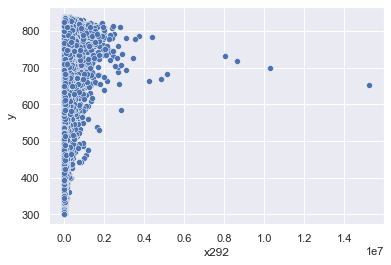

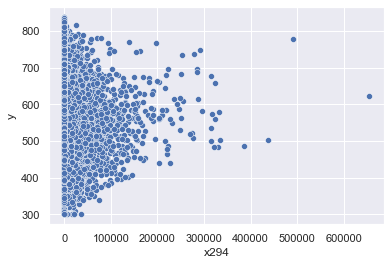

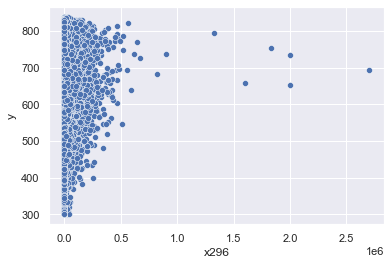

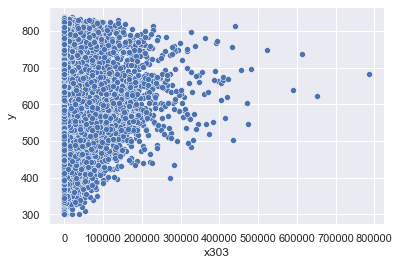

In [17]:
for col in numerical:
    if (traindata['y'].corr(traindata[col]) < 0.5) and (traindata['y'].corr(traindata[col]) > -0.5):
        fig,ax=plt.subplots()
        sns.scatterplot(data = traindata, x = col, y = 'y', ax = ax)

Все графики, не считая первого, с низкой корреляцией имеет хоть и несильную, но зависимость. Низкую корреляцию легко объяснить ее нелинейностью. 
Принято решение их оставить. 

In [18]:
traindata.drop('x001', 1, inplace=True)

### Теперь разберемся с белым квадратом на матрице корреляции. Пройдемся по всем парам колонок, которые имеют корреляция выше 0.9, и удалим ту, что имеет меньше корреляцию с таргетом. Мультиколлинеарность нам нестрашна, но лишние вычисления делать не хочется. Колонки содержут в себе практически одну и ту же информацию.

In [19]:
numerical.remove('x001')

In [20]:
draftlist = numerical.copy()
columns = []
for col in draftlist:
    draftlist.remove(col)
    for row in draftlist:     
        if (traindata[col].corr(traindata[row]) > 0.9) or (traindata[col].corr(traindata[row]) < -0.9):
            if (traindata['y'].corr(traindata[row]) > (traindata['y'].corr(traindata[col]))):
                columns.append(row)
            else:
                columns.append(col)

In [21]:
traindata.drop(list(set(columns)), 1, inplace = True)

In [22]:
for col in list(set(columns)):
    numerical.remove(col)               

<AxesSubplot:>

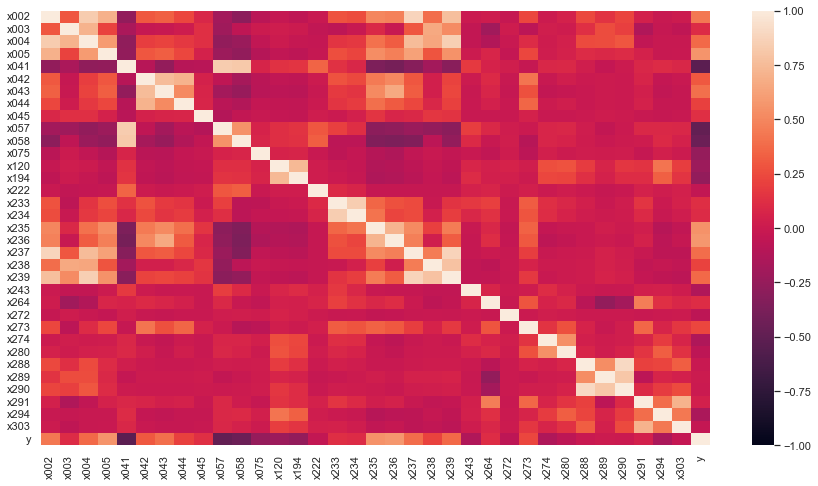

In [23]:
plt.figure(figsize=(15,8))
corr_matrix = traindata[numerical].corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1)

### Нормализируем наши данные, для категориальных фичей воспользуемся MeanTarget методом, а для численных MinMaxScaler.

In [24]:
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
encoder = ColumnTransformer(transformers = [("meantargetencoding", TargetEncoder(), categorical),
                                            ('datascaling',MinMaxScaler(),numerical)])

In [25]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(traindata.drop('y', 1),  traindata.y, test_size=0.33, random_state=42)

In [27]:
numerical.remove('y')

In [40]:
encoder.fit(X_train, y_train)

ColumnTransformer(transformers=[('meantargetencoding', TargetEncoder(),
                                 ['x006', 'x007', 'x008', 'x009', 'x010',
                                  'x011', 'x012', 'x013', 'x014', 'x015',
                                  'x016', 'x017', 'x018', 'x019', 'x020',
                                  'x021', 'x022', 'x023', 'x024', 'x025',
                                  'x026', 'x027', 'x028', 'x029', 'x030',
                                  'x031', 'x032', 'x033', 'x034', 'x035', ...]),
                                ('datascaling', MinMaxScaler(),
                                 ['x002', 'x003', 'x004', 'x005', 'x041',
                                  'x042', 'x043', 'x044', 'x045', 'x057',
                                  'x058', 'x075', 'x120', 'x194', 'x222',
                                  'x233', 'x234', 'x235', 'x236', 'x237',
                                  'x238', 'x239', 'x243', 'x264', 'x272',
                                  'x273', 'x274', 'x280', 'x288', 'x289', ...])])

In [41]:
X_train = pd.DataFrame(encoder.transform(X_train))
X_test = pd.DataFrame(encoder.transform(X_test))

### Натренируем дерево решений на полученных данных с дефолтными настройками. И посмотрим на результат на тесте. 

In [31]:
%%time
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

CPU times: user 2min 4s, sys: 415 ms, total: 2min 5s
Wall time: 2min 5s


RandomForestRegressor(max_depth=10, random_state=0)

In [32]:
clf.score(X_test, y_test)

0.9169788893803615

Точность очень хорошая, но алгоритм тренировался 2 минуты!! 

### Попробуем воспользоваться методом главных компонент для уменьшения признакового пространства, чтобы ускорить процесс обучения. 

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [34]:
pca.fit(X_train)

PCA(n_components=200)

In [35]:
X_train_pca = pd.DataFrame(pca.transform(X_train))
X_test_pca = pd.DataFrame(pca.transform(X_test))

In [36]:
%%time
clf.fit(X_train_pca, y_train)

CPU times: user 9min 5s, sys: 1.28 s, total: 9min 6s
Wall time: 9min 8s


RandomForestRegressor(max_depth=10, random_state=0)

In [38]:
clf.score(X_test_pca, y_test)

0.8561880101185243

Мы сильно теряем в качестве, поэтому вернемся к изначальным признакам. 

### Проведем легкий и символический поиск гиперпараметров, так как мы ограничены возможностями нашего компьютера. 

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_depth' : [10, 14],
}
gscv = GridSearchCV(clf, param_grid, verbose=10, cv = 2)
gscv.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2; 1/6] START max_depth=10, n_estimators=100..............................
[CV 1/2; 1/6] END max_depth=10, n_estimators=100;, score=0.917 total time=  56.4s
[CV 2/2; 1/6] START max_depth=10, n_estimators=100..............................
[CV 2/2; 1/6] END max_depth=10, n_estimators=100;, score=0.915 total time=  56.7s
[CV 1/2; 2/6] START max_depth=10, n_estimators=200..............................
[CV 1/2; 2/6] END max_depth=10, n_estimators=200;, score=0.918 total time= 1.9min
[CV 2/2; 2/6] START max_depth=10, n_estimators=200..............................
[CV 2/2; 2/6] END max_depth=10, n_estimators=200;, score=0.915 total time= 1.9min
[CV 1/2; 3/6] START max_depth=10, n_estimators=300..............................
[CV 1/2; 3/6] END max_depth=10, n_estimators=300;, score=0.918 total time= 2.7min
[CV 2/2; 3/6] START max_depth=10, n_estimators=300..............................
[CV 2/2; 3/6] END max_depth=10, n_estimators

GridSearchCV(cv=2,
             estimator=RandomForestRegressor(max_depth=10, random_state=0),
             param_grid={'max_depth': [10, 14],
                         'n_estimators': [100, 200, 300]},
             verbose=10)

GridSearchCV показал нам, что лучше классифицирует лес с 300 деревьями и глубиной 14, чего и следовало ожидать.

In [47]:
gscv.best_estimator_

RandomForestRegressor(max_depth=14, n_estimators=300, random_state=0)

In [49]:
gscv.best_estimator_.score(X_test, y_test)

0.9324313642525367